In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
variable_base = automap_base()
variable_base.prepare(engine, reflect=True)

/var/folders/zv/8pj2666n6flc8m1c0w9lgrb40000gn/T/ipykernel_27768/1537299942.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  variable_base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
variable_base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
measurement_info = variable_base.classes.measurement
station_info = variable_base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
available_dates = session.query(measurement_info.date).order_by(measurement_info.date.desc())
recent_date = available_dates[0][0]
recent_date

'2017-08-23'

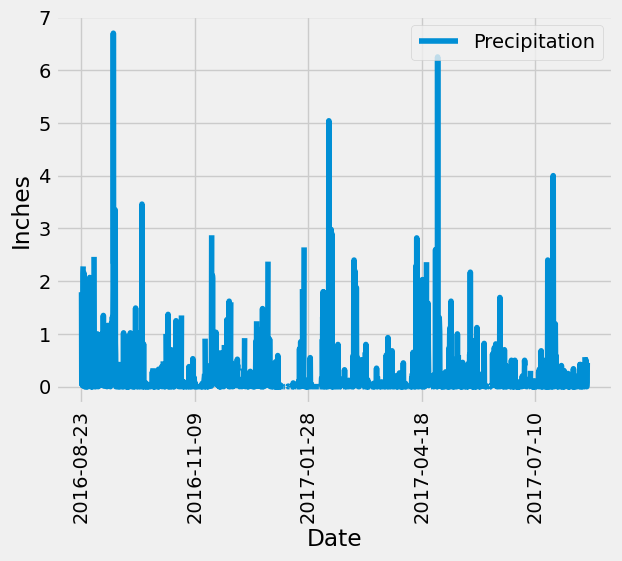

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year_data = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement_info.date, measurement_info.prcp).filter(measurement_info.date >= last_year_data).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
pandas_df = pd.DataFrame(results, columns=['Date', 'precipitation'])

# Sort the dataframe by date
pandas_df = pandas_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
plot = pandas_df.plot(x='Date', y='precipitation', rot=90, legend=True)
plot.set_ylabel('Inches')
plot.legend(['Precipitation'], loc='upper right')

plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
pandas_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(station_info.id).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement_info.station,func.count(measurement_info.station)).group_by(measurement_info.station)\
    .order_by(func.count(measurement_info.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement_info.tobs),func.max(measurement_info.tobs),func.avg(measurement_info.tobs))\
.filter(measurement_info.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

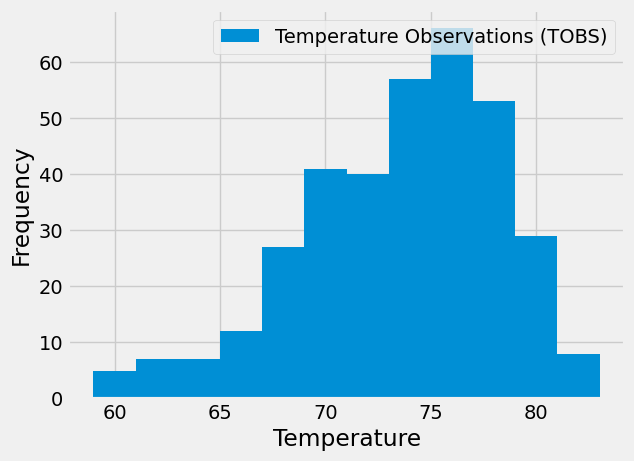

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement_info.tobs).filter(measurement_info.station=='USC00519281')\
    .filter(measurement_info.date>='2016-08-23').all()

high_station_temp=pd.DataFrame(results,columns=['Temperature Observations (TOBS)'])
high_station_temp.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()


# Close Session

In [16]:
# Close Session
session.close()